<a href="https://colab.research.google.com/github/Jyo172/projects-from-scratch/blob/master/Mahindra_First%20Choice_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files, drive
drive.mount('gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive


In [ ]:
!cp 'gdrive/My Drive/Cap.zip' .
!unzip Cap.zip

Archive:  Cap.zip
  inflating: Mahindra_file.png       
  inflating: plant.csv               
  inflating: vehicles.csv            
  inflating: customer.csv            
  inflating: jtd.csv                 
  inflating: invoice.csv             


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
customer = pd.read_csv('customer.csv')
plant = pd.read_csv('plant.csv')
vehicle = pd.read_csv('vehicles.csv')
jtd= pd.read_csv('jtd.csv')
invoice= pd.read_csv('invoice.csv')

In [ ]:
customer.columns

Index(['Unnamed: 0', 'Business Partner', 'Customer No.', 'Partner Type',
       'Data Origin', 'Title', 'Marital Status', 'Occupation', 'Date of Birth',
       'Death date'],
      dtype='object')

In [ ]:
cus_df = customer.drop(['Marital Status','Occupation','Date of Birth','Death date','Unnamed: 0','Business Partner','Customer No.'],axis=1)

In [ ]:
cus_df.head()

,Partner Type,Data Origin,Title
0,1.0,Z001,NaN
1,1.0,Z005,NaN
2,1.0,Z005,NaN
3,1.0,Z005,NaN
4,1.0,Z008,NaN


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plot_vc(df,col,title):
  
  plt.style.use('seaborn')
  x=df[col].value_counts()
  x=x.reset_index()
  x[col]=100*x[col]/sum(x[col])
  x=x.sort_values(col)
  x=x[x[col]>1]
  #print(x['index'].to_list())
  plt.barh(x['index'],x[col])
  plt.title(title)
  plt.xlabel('Percentage')
  plt.tight_layout()
  plt.show()

In [ ]:
dic={'Z001':'Camp-Outdoor','Z002':'Camp-Workshop','Z003':'Emailers','Z004':'Fleet','Z005':'Ref-Customer','Z006':'Ref-Employee','Z007':'Used Car Dealer','Z008':'Just Dial/Other','Z009':'Snapdeal/Web','Z010':'Company website','Z011':'Float activity','Z012':'Petrol pump','Z013':'Hoardings/ADVT','Z014':'Insurance Co','Z015':'Television AD','Z016':'Newspaper AD','Z017':'Newsppr leaflet','Z018':'Sales Activity','Z019':'Spotted outlet','Z020':'M & M Employee','Z021':'Outdoor Activty','Z022':'Radio'}
cus_df['data_origin_map']=cus_df['Data Origin'].astype(str).map(dic)
cus_df['data_origin_map'].head()

0       Camp-Outdoor
1       Ref-Customer
2       Ref-Customer
3       Ref-Customer
4    Just Dial/Other
Name: data_origin_map, dtype: object

In [ ]:
partner = {'1.0':'Retail','2.0':'Corporate','3.0':'Fleet','4.0':'Employee','9001.0':'Insurance Company','9002.0':'Surveyor','9003.0':'Contact Person'}
cus_df['partner_type_map']=cus_df['Partner Type'].astype(str).map(partner)
cus_df['partner_type_map'].head()

0    Retail
1    Retail
2    Retail
3    Retail
4    Retail
Name: partner_type_map, dtype: object

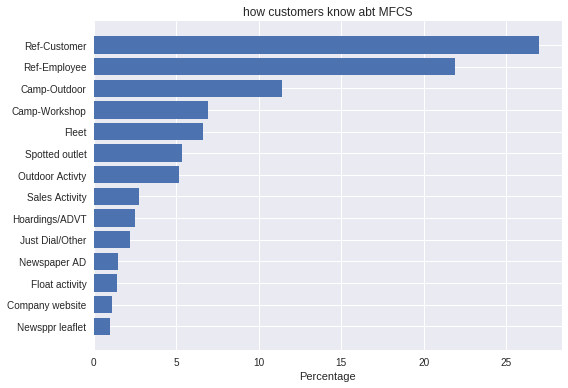

In [ ]:
plot_vc(cus_df,'data_origin_map','how customers know abt MFCS')

In [ ]:
#columns where 50 percent or more data is missing
temp=100*invoice.isnull().sum()/len(invoice)
temp[temp >50].index

Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)',
       'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'Cash /Cashless Type',
       'Claim No.', 'Expiry Date', 'Gate Pass Date', 'IGST(12%)', 'IGST(18%)',
       'IGST(28%)', 'IGST(5%)', 'Insurance Company', 'ODN No.',
       'Outstanding Amt', 'Policy no.', 'SGST/UGST(14%)', 'SGST/UGST(2.5%)',
       'SGST/UGST(6%)', 'SGST/UGST(9%)', 'Service Advisor Name', 'TDS amount',
       'Technician Name', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value'],
      dtype='object')

In [ ]:
invoice_df=invoice.drop(temp[temp >50].index,axis=1)
invoice_df.drop(['Unnamed: 0','Invoice No','Job Card No'],axis=1,inplace=True)
invoice_df.head().T

,0,1,2,3,4
Area / Locality,NaN,NaN,NaN,NaN,NaN
CITY,Nashik,THANE,Hyderabad,Hyderabad,Hyderabad
Cust Type,Retail,Retail,Retail,Retail,Retail
Customer No.,E14006,0000000017,0000000007,E22364,E25218
District,Maharashtra,Maharashtra,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh
Gate Pass Time,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
Invoice Date,2012-04-02,2012-04-02,2012-04-02,2012-04-02,2012-04-02
Invoice Time,17:04:33,17:26:52,17:44:03,20:04:51,20:24:21
JobCard Date,2012-04-02,2012-04-02,2012-04-02,2012-04-01,2012-04-01
JobCard Time,15:15:31,16:13:11,12:47:59,16:19:32,16:19:32


In [ ]:
#proved that invoice and customer can't b mapped on customer no
c=0
for i in invoice['Customer No.']:
  if i not in customer['Customer No.']:
    c=c+1
print(c,invoice.shape)   

984741 (984741, 59)


In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID'],
      dtype='object')

In [ ]:
invoice_df['CITY']=invoice_df['CITY'].str.lower()

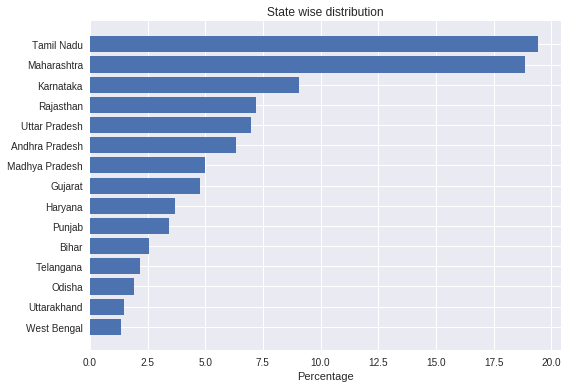

In [ ]:
plot_vc(invoice_df,'District','State wise distribution')

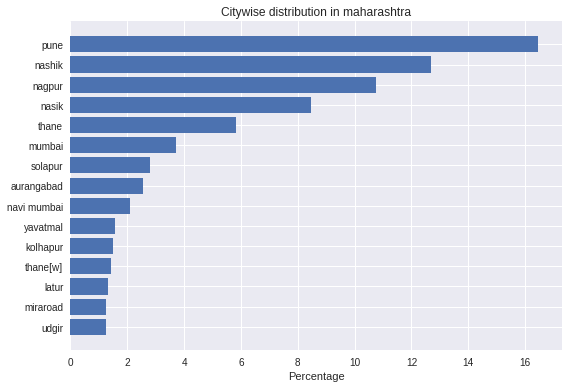

In [ ]:
plot_vc(invoice_df[invoice_df['District'] == 'Maharashtra'],'CITY','Citywise distribution in maharashtra')

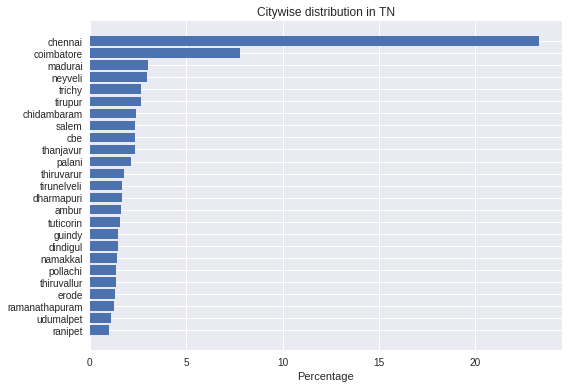

In [ ]:
plot_vc(invoice_df[invoice_df['District'] == 'Tamil Nadu'],'CITY','Citywise distribution in TN')

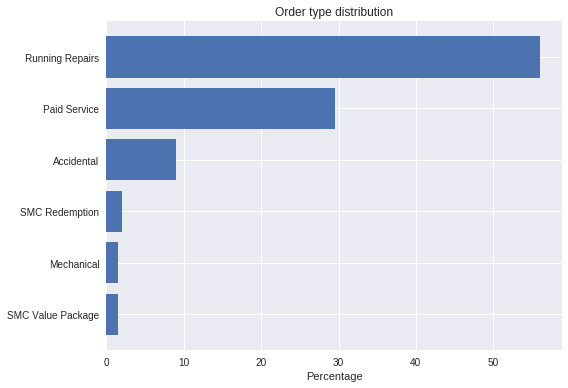

In [ ]:
plot_vc(invoice_df,'Order Type','Order type distribution')

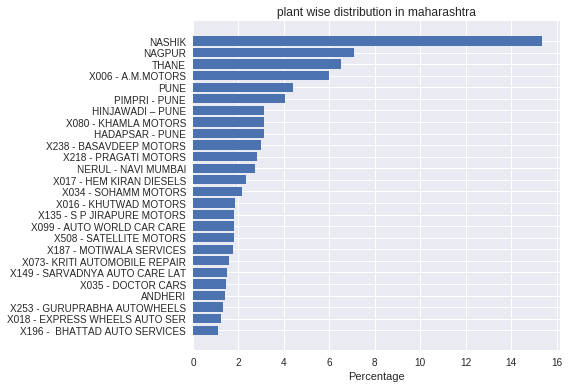

In [ ]:
plot_vc(invoice_df[invoice_df['District'] == 'Maharashtra'],'Plant Name1','plant wise distribution in maharashtra')

In [ ]:
def scatter_plot(df,x,y):
  plt.style.use('seaborn')
  plt.scatter(df[x],df[y])
  #cbar=plt.colorbar()
  #cbar.set_label('Price variation')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title('{} vs {}'.format(x,y))
  plt.show()

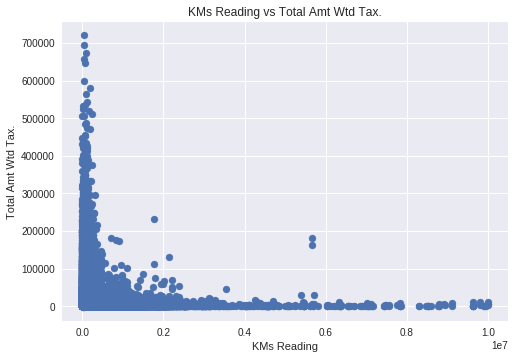

In [ ]:
scatter_plot(invoice_df,'KMs Reading','Total Amt Wtd Tax.')

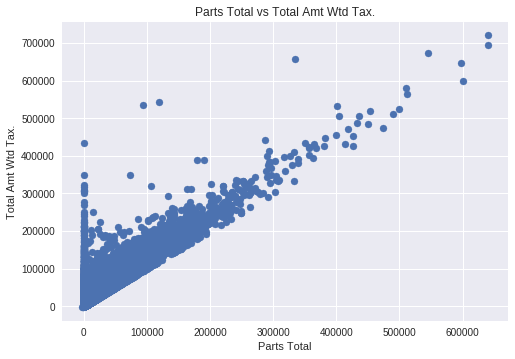

In [ ]:
scatter_plot(invoice_df,'Parts Total','Total Amt Wtd Tax.')

In [ ]:
import seaborn as sns

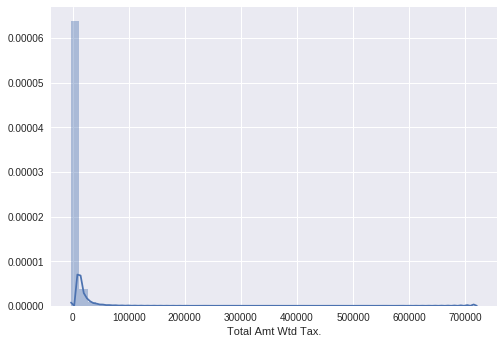

In [ ]:
invoice_df['target_log']=np.log(invoice_df['Total Amt Wtd Tax.']+0.0000000001)
sns.distplot(invoice_df['Total Amt Wtd Tax.'])

In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'target_log'],
      dtype='object')

In [ ]:
from datetime import *
invoice_df['Invoice Date']=pd.to_datetime(invoice_df['Invoice Date'])
invoice_df['Invoice Date'].head()

0   2012-04-02
1   2012-04-02
2   2012-04-02
3   2012-04-02
4   2012-04-02
Name: Invoice Date, dtype: datetime64[ns]

In [ ]:
invoice_df['year']=invoice_df['Invoice Date'].dt.year
invoice_df['month']=invoice_df['Invoice Date'].dt.month

In [ ]:
# use unstack()
list=['Maharashtra', 'Tamil Nadu', 'Madhya Pradesh','Andhra Pradesh', 'Uttar Pradesh', 'Rajasthan']
list2=['Karnataka','West Bengal', 'Uttarakhand', 'Odisha', 'Telangana', 'Bihar', 'Punjab', 'Haryana', 'Gujarat' ]
invoice_df['state']=invoice_df['District']
invoice_df['state']=invoice_df['state'].apply(lambda x:'no' if x not in list else 'yes')
state_df=invoice_df[invoice_df['state'] == 'yes']


Text(0.5, 1.0, 'Yearwise total amt spent in top states')

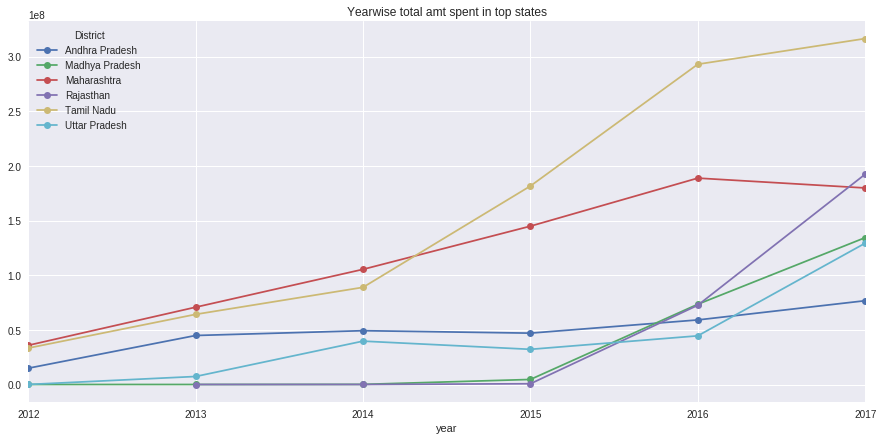

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
state_df.groupby(['year','District'])['Total Amt Wtd Tax.'].sum().unstack().plot(ax=ax,marker='o')
plt.title('Yearwise total amt spent in top states')

Text(0.5, 1.0, 'Amount time series of top states')

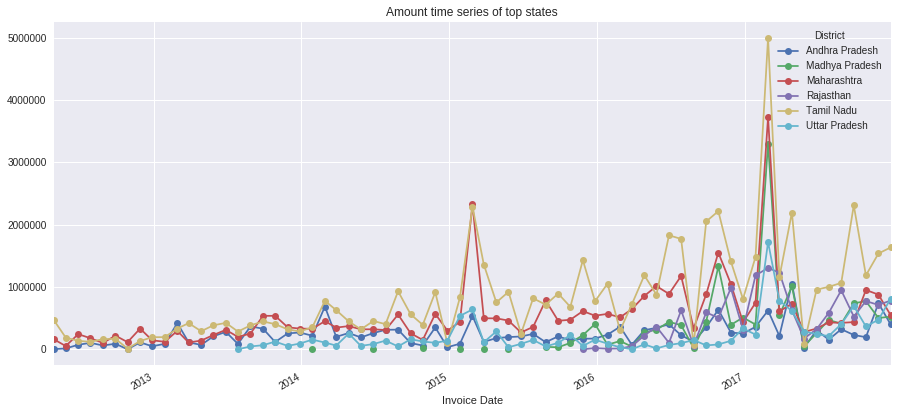

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
state_df['day']=state_df['Invoice Date'].dt.day
n=state_df[state_df['day']==28]
n.groupby(['Invoice Date','District'])['Total Amt Wtd Tax.'].sum().unstack().plot(ax=ax,marker='o')
plt.title('Amount time series of top states')

In [ ]:
#Inferences: No trend seasonality in amt distribution statewise

In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'target_log', 'year', 'month',
       'state'],
      dtype='object')

In [ ]:
invoice_df['Parts Total'].dtype

dtype('float64')

In [ ]:
def plot_groupby(df,col1,col2):
  gp=df.groupby(col1)[col2].sum()
  gp=100*gp/sum(gp)
  gp=gp[gp>1]
  print(gp.index)
  gp.sort_values().plot(kind='barh')
  plt.style.use('fivethirtyeight')
  plt.title('{}wise Total {} percentage'.format(col1,col2))
  plt.xlabel('Percentage')
  plt.tight_layout()
  

Index(['FIAT', 'FORD', 'GENERAL MOTORS', 'HONDA', 'HYUNDAI',
       'MAHINDRA &  MAHINDRA', 'MARUTI SUZUKI', 'RENAULT', 'SKODA',
       'TATA MOTORS', 'TOYOTA', 'VOLKSWAGEN'],
      dtype='object', name='Make')


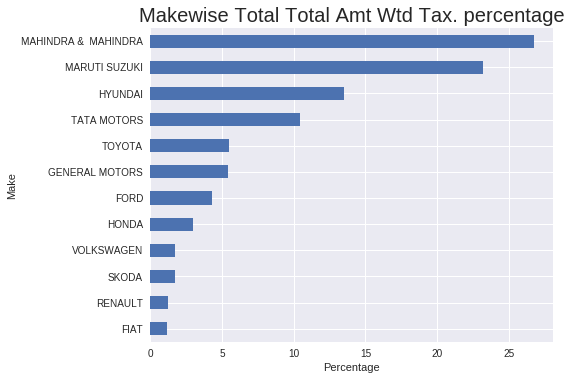

In [ ]:
plot_groupby(invoice_df,'Make','Total Amt Wtd Tax.')#though maruti suzuki services are more total earnings from mahindra and mahindra is more

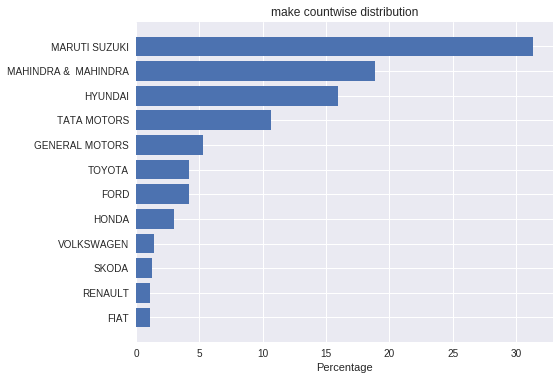

In [ ]:
plot_vc(invoice_df,'Make','make countwise distribution')

Index(['FIAT', 'FORD', 'GENERAL MOTORS', 'HONDA', 'HYUNDAI',
       'MAHINDRA &  MAHINDRA', 'MARUTI SUZUKI', 'RENAULT', 'SKODA',
       'TATA MOTORS', 'TOYOTA', 'VOLKSWAGEN'],
      dtype='object', name='Make')


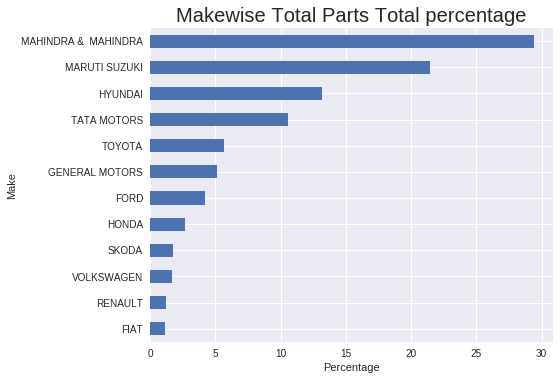

In [ ]:
plot_groupby(invoice_df,'Make','Parts Total')

Text(0.5, 1.0, 'Yearwise total amt spent in top Makes')

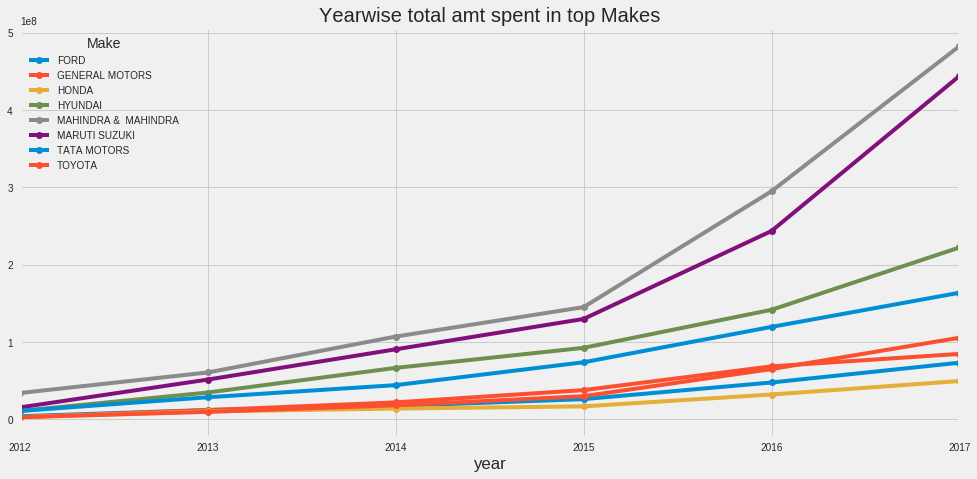

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
list=['FORD', 'GENERAL MOTORS', 'HONDA', 'HYUNDAI','MAHINDRA &  MAHINDRA', 'MARUTI SUZUKI','TATA MOTORS', 'TOYOTA']
invoice_df['m']=invoice_df['Make']
invoice_df['m']=invoice_df['m'].apply(lambda x:'no' if x not in list else 'yes')
make_df=invoice_df[invoice_df['m'] == 'yes']
make_df.groupby(['year','Make'])['Total Amt Wtd Tax.'].sum().unstack().plot(ax=ax,marker='o')
plt.title('Yearwise total amt spent in top Makes')

In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'target_log', 'year', 'month', 'state',
       'm'],
      dtype='object')

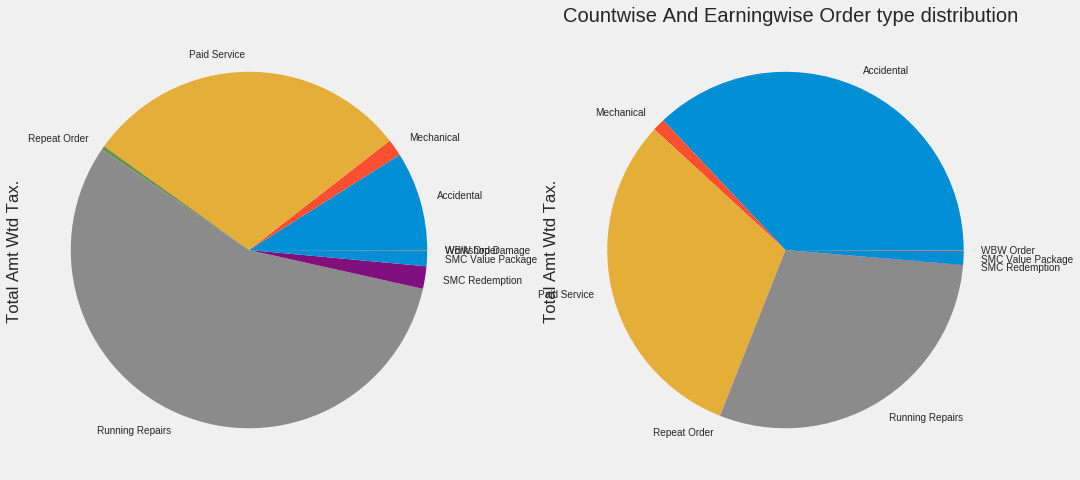

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.style.use('fivethirtyeight')
invoice_df.groupby('Order Type')['Total Amt Wtd Tax.'].count().plot(kind='pie',ax=ax[0])
plt.title('Countwise And Earningwise Order type distribution',loc='left')
invoice_df.groupby('Order Type')['Total Amt Wtd Tax.'].sum().plot(kind='pie',ax=ax[1])
plt.tight_layout()
#plt.legend(loc='upper right')
plt.show()

In [ ]:
invoice_df['Cust Type'].value_counts()

Retail              977685
Insurance             3471
Fleets                2233
Corporate others       644
Corporate- M&M         311
MFCWL                  253
Franchise              140
Name: Cust Type, dtype: int64

In [ ]:
from wordcloud import WordCloud
def create_wordcloud(sentiments):
  wordcloud = WordCloud(background_color='black',
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)
  
  for i in range(len(sentiments)):
    print("wordcloud for sentiments ", i)
    wordcloud.generate(sentiments[i])
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [ ]:
vehicle.head()

,Unnamed: 0,Vehicle Model,Product GUID,License Plate Number,Fuel Type
0,0,Z_MAHINDRA,000C2937F0991ED493A0CC3579ED97ED,MH12HN2835,2
1,1,Z_TATA,000C2937F0991ED493A19620CB69DDA0,TN10AL3462,2
2,2,Z_MARUTI,000C2937F0991ED493A28DAFBFBA870E,AP28DG9695,1
3,3,Z_HONDA,000C2937F0991ED493A496B779A143D3,MH15DS9580,1
4,4,Z_MARUTI,000C2937F0991ED493A58273B92EC2F8,MH14CK0669,2


In [ ]:
jtd.Description.nunique()

58558

In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'target_log', 'year', 'month', 'state',
       'm'],
      dtype='object')

In [ ]:
invoice_df['Cust Type'].value_counts()

Retail              977685
Insurance             3471
Fleets                2233
Corporate others       644
Corporate- M&M         311
MFCWL                  253
Franchise              140
Name: Cust Type, dtype: int64

Text(0.5, 1.0, 'Cust Type ditribution in state')

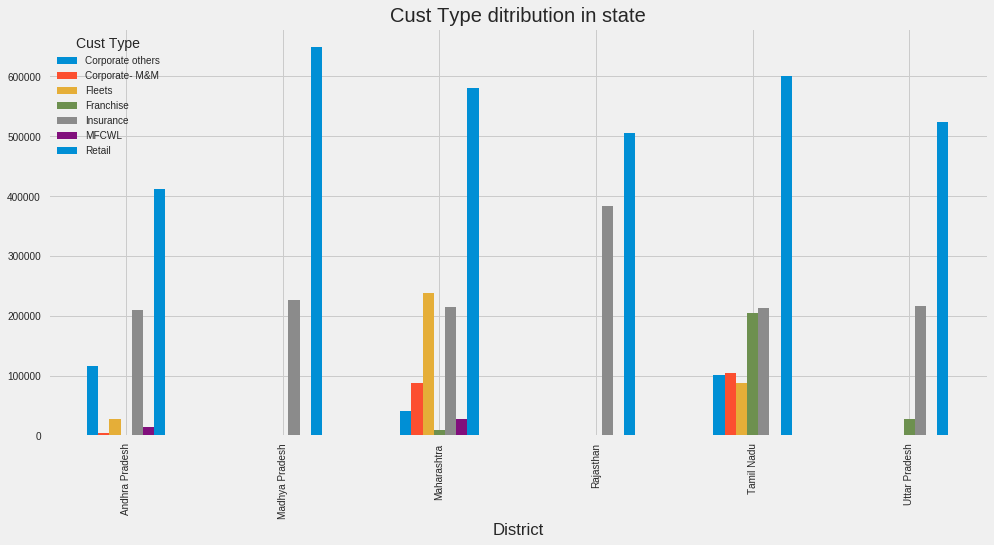

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
state_df.groupby(['District','Cust Type'])['Total Amt Wtd Tax.'].max().unstack().plot(ax=ax,kind='bar',)
plt.title('Cust Type ditribution in state')

Text(0.5, 1.0, 'Order Type ditribution in state')

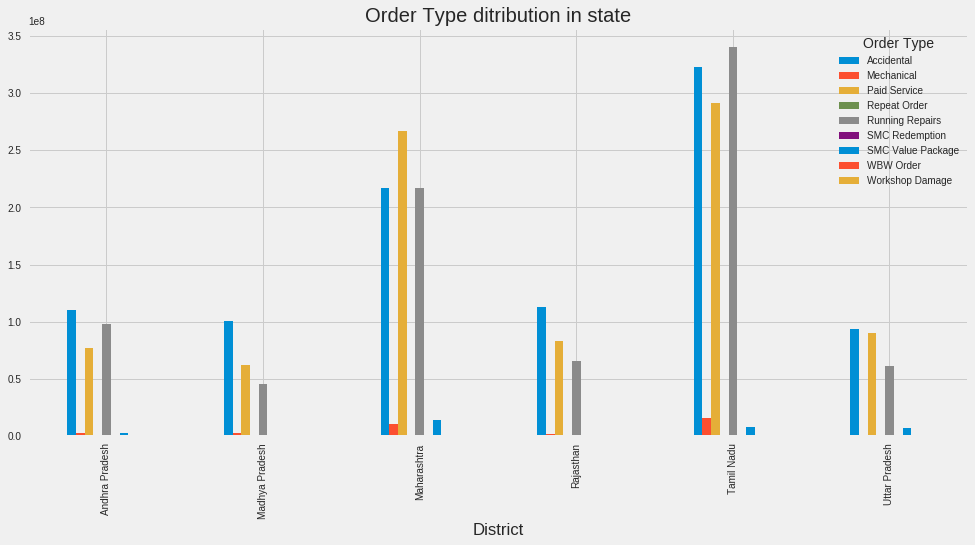

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
state_df.groupby(['District','Order Type'])['Total Amt Wtd Tax.'].sum().unstack().plot(ax=ax,kind='bar',)
plt.title('Order Type ditribution in state')

In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'target_log', 'year', 'month', 'state',
       'm'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans
def Knumber(df):
  dist=[]
  # Iterate from 1-9
  for i in range(1,10):
    # Initialize KMeans algorithm
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    # Fit on data
    km.fit(df)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)
  # Initialize figure
  fig=plt.figure( figsize=[10,8])
  # Line plot # clusters on X-axis and WCSS on Y-axis 
  plt.plot(range(1,10),dist)
  plt.xlabel('K-no of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [ ]:
invoice_df.isnull().sum()

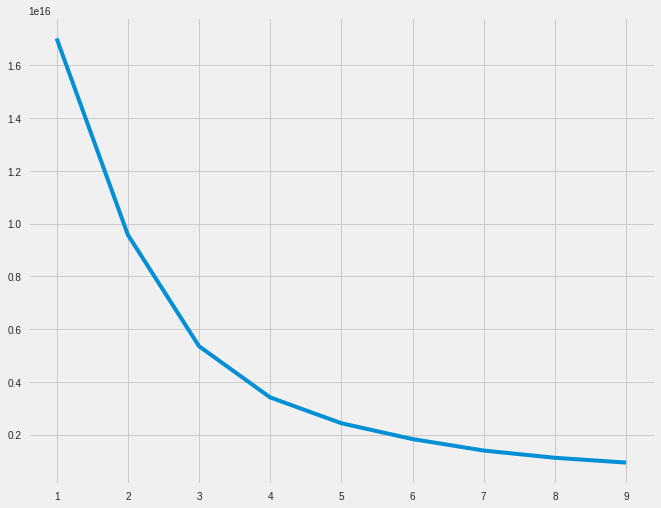

In [ ]:
df=invoice_df[['KMs Reading','Total Amt Wtd Tax.']]
Knumber(df)

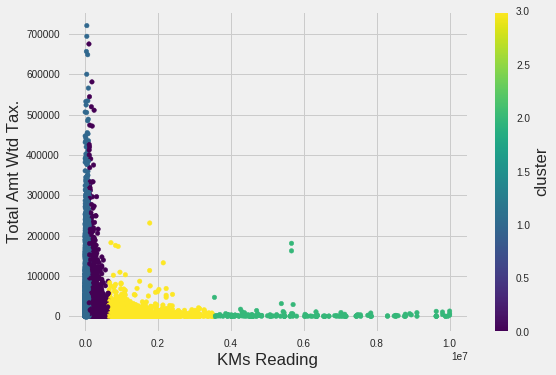

In [ ]:
cluster=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
# create 'cluster' column
df['cluster']=cluster.fit_predict(df)
df.plot.scatter('KMs Reading','Total Amt Wtd Tax.', c='cluster', cmap='viridis')

In [ ]:
from sklearn.preprocessing import LabelEncoder

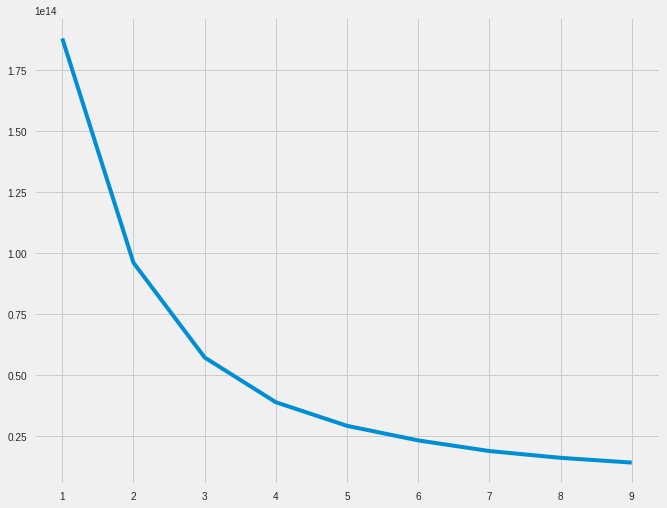

In [ ]:
df1=invoice_df[['Parts Total','Total Amt Wtd Tax.']]
Knumber(df1)

In [ ]:
cluster=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
# create 'cluster' column
df1['cluster']=cluster.fit_predict(df)
df1.plot.scatter('Parts Total','Total Amt Wtd Tax.', c='cluster', cmap='viridis')

In [ ]:
invoice_df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'target_log', 'year', 'month', 'state',
       'm'],
      dtype='object')

In [ ]:
cl_df=invoice_df[['District','KMs Reading','Labour Total','Make','Order Type','Plant Name1','Total Amt Wtd Tax.','year', 'month']]

In [ ]:
cl_df.head()

,District,KMs Reading,Labour Total,Make,Order Type,Plant Name1,Total Amt Wtd Tax.,year,month
0,Maharashtra,80440,420.09,HYUNDAI,Running Repairs,NASHIK,420.09,2012,4
1,Maharashtra,98474,179.75,MAHINDRA & MAHINDRA,Running Repairs,THANE,179.75,2012,4
2,Andhra Pradesh,137832,1340.37,MAHINDRA & MAHINDRA,Paid Service,BALANAGAR,1340.37,2012,4
3,Andhra Pradesh,75627,1709.06,MAHINDRA & MAHINDRA,Paid Service,BALANAGAR,5506.45,2012,4
4,Andhra Pradesh,1,2074.88,TATA MOTORS,Accidental,BALANAGAR,5180.55,2012,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder() 
cl_df['District']= label_encoder.fit_transform(cl_df['District'])

In [ ]:
l1 = LabelEncoder() 
l2 = LabelEncoder() 
l3= LabelEncoder()
l4=LabelEncoder()
l5=LabelEncoder()
cl_df['Make']= l1.fit_transform(cl_df['Make'])

In [ ]:
cl_df['Order Type']= l3.fit_transform(cl_df['Order Type'])

In [ ]:
cl_df['Plant Name1']= l4.fit_transform(cl_df['Plant Name1'])


In [ ]:
cl_df.head()

,District,KMs Reading,Labour Total,Make,Order Type,Plant Name1,Total Amt Wtd Tax.,year,month
0,20,80440,420.09,9,4,18,420.09,2012,4
1,20,98474,179.75,12,4,29,179.75,2012,4
2,1,137832,1340.37,12,2,2,1340.37,2012,4
3,1,75627,1709.06,12,2,2,5506.45,2012,4
4,1,1,2074.88,24,0,2,5180.55,2012,4


In [ ]:
cl_df=cl_df.dropna()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

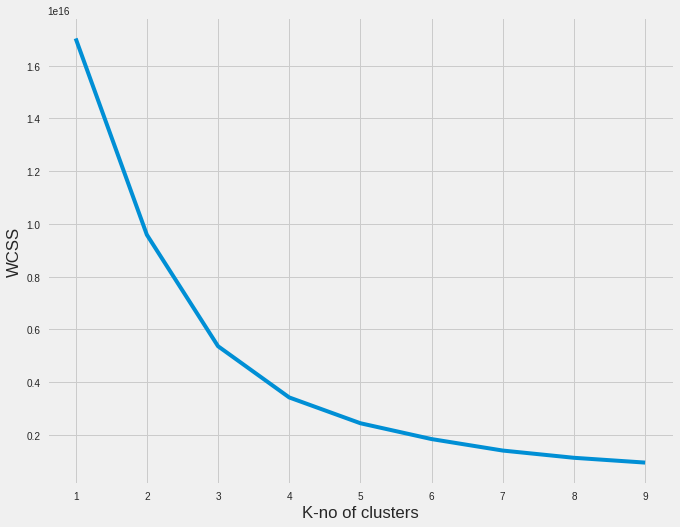

In [ ]:
Knumber(cl_df)

In [ ]:
matrix=cl_df
cluster=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
# create 'cluster' column
matrix['cluster']=cluster.fit_predict(matrix)
print(matrix.head())

   District  KMs Reading  Labour Total  ...  year  month  cluster
0        20        80440        420.09  ...  2012      4        3
1        20        98474        179.75  ...  2012      4        3
2         1       137832       1340.37  ...  2012      4        0
3         1        75627       1709.06  ...  2012      4        3
4         1            1       2074.88  ...  2012      4        3

[5 rows x 10 columns]


In [ ]:
matrix.cluster.value_counts()

3    775853
0    202519
2      5345
4       871
1       153
Name: cluster, dtype: int64

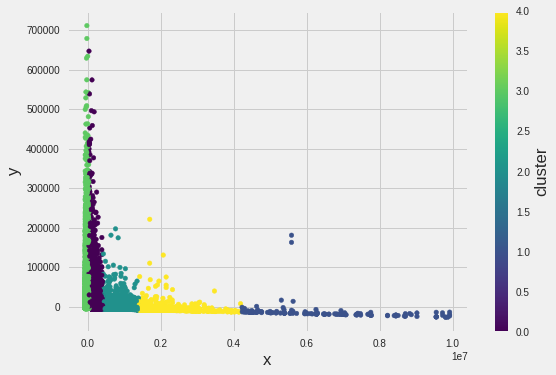

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=0)
# create 'x' and 'y' columns donoting observation locations in decomposed form
matrix['x']=pca.fit_transform(matrix)[:,0]
matrix['y']=pca.fit_transform(matrix)[:,1]
# dataframe to visualize clusters by customer names
clusters=matrix[['Total Amt Wtd Tax.','cluster','x','y']]
# visualize clusters
clusters.plot.scatter('x', 'y', c='cluster', cmap='viridis')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(matrix['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)